<a href="https://colab.research.google.com/github/Prajwal-ak-0/GenAIBootcamp/blob/main/GenBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to `Fasttext` and `gensim` library

In [1]:
from gensim.models import KeyedVectors

# Load the word embeddings
word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/wiki-news-300d-1M.vec')

In [15]:
# Get the vector corresponding to a word
vector = word_vectors['beautiful']
print("Word Vector for 'beautiful':", vector)


Word Vector for 'beautiful': [ 7.470e-02 -1.296e-01 -1.280e-02 -7.950e-02 -3.080e-02  3.100e-02
 -8.310e-02  1.055e-01 -1.157e-01  1.269e-01 -2.230e-02 -6.670e-02
  2.100e-03 -1.243e-01  8.000e-02  6.680e-02  9.140e-02 -7.920e-02
  1.080e-02 -1.228e-01 -5.720e-02  4.320e-02  5.340e-02  1.008e-01
 -3.380e-02  5.280e-02 -6.140e-02 -1.515e-01  6.200e-03 -2.870e-02
 -1.080e-02  2.700e-02  8.790e-02 -2.230e-02  2.610e-02 -6.160e-02
 -7.820e-02 -4.470e-02 -8.000e-03  2.000e-04  1.244e-01 -4.180e-02
 -2.930e-02 -1.095e-01 -6.000e-04 -2.820e-02  1.260e-02 -1.180e-01
 -1.065e-01 -4.910e-02 -3.510e-02 -4.680e-02 -7.274e-01  6.710e-02
 -5.510e-02 -9.840e-02 -1.490e-01  8.370e-02 -3.700e-03  6.160e-02
  1.501e-01 -1.293e-01  4.070e-02 -3.700e-02 -3.660e-02 -1.323e-01
  1.422e-01  9.900e-02  6.340e-02 -2.420e-02  8.870e-02  6.560e-02
 -5.830e-02  4.280e-02 -2.440e-02 -4.710e-02 -1.950e-02 -3.720e-02
 -5.220e-02 -1.610e-02  3.480e-02  3.960e-02 -8.730e-02 -1.649e-01
 -6.670e-02  2.210e-02  3.370e-02

In [16]:
# Finding the similar words
similar_words = word_vectors.similar_by_word("beautiful", topn=5)
print("\nTop 5 words similar to 'beautiful':", similar_words)


Top 5 words similar to 'beautiful': [('gorgeous', 0.8433856964111328), ('lovely', 0.8281809687614441), ('charming', 0.7809241414070129), ('magnificent', 0.7750603556632996), ('wonderful', 0.753922164440155)]


In [17]:
# Finding the odd one out
odd_one_out = word_vectors.doesnt_match(["wicket", "bat", "ball", "stumps", "lunch"])
print("\nWord that doesn't match:", odd_one_out)


Word that doesn't match: lunch


In [21]:
# Calculating the similarity between words
similarity = word_vectors.similarity('woman', 'man')
print("\nSimilarity between 'night watchman' and 'man':", similarity)


Similarity between 'night watchman' and 'man': 0.81645226


In [23]:
# Resulting word from the the combination

resulting_word = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)
print("\nResulting word 'woman' : 'man' :: 'king' :: ? :", resulting_word)


Resulting word 'woman' : 'man' :: 'king' :: ? : [('queen', 0.751591145992279), ('monarch', 0.6741327047348022), ('princess', 0.6713886857032776)]


In [35]:
# Check if a word is in the vocabulary
word = 'tennis'
if word in word_vectors:
    print(f"\n'{word}' is in the vocabulary.")
else:
    print(f"\n'{word}' is not in the vocabulary.")


'tennis' is in the vocabulary.


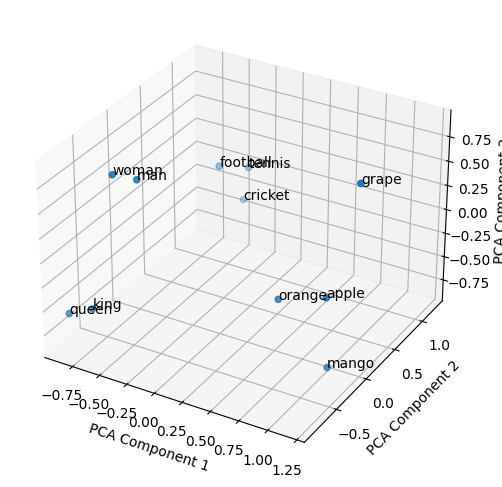

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'mango', 'grape', 'cricket', 'football', 'tennis']

word_vecs = []

for word in words:
  word_vector = word_vectors[word]
  word_vecs.append(word_vector)

pca = PCA(n_components=3)
result = pca.fit_transform(word_vecs)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(result[:, 0], result[:, 1], result[:, 2])

for i, word in enumerate(words):
    ax.text(result[i, 0], result[i, 1], result[i, 2], word)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

In [41]:
from sklearn.cluster import KMeans
import numpy as np

# List of words to cluster
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'breakfast', 'dinner']
word_vecs = [word_vectors[word] for word in words]

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(word_vecs)
labels = kmeans.labels_

# Print the clusters
cluster_1 = [words[i] for i in range(len(words)) if labels[i] == 0]
cluster_2 = [words[i] for i in range(len(words)) if labels[i] == 1]
print("\nCluster 1:", cluster_1)
print("Cluster 2:", cluster_2)



Cluster 1: ['king', 'queen', 'man', 'woman', 'apple', 'orange']
Cluster 2: ['breakfast', 'dinner']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Sentiment Analysis Problem

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv('/content/drive/MyDrive/train.csv', encoding='latin-1')
test_dataset = pd.read_csv('/content/drive/MyDrive/test.csv', encoding='latin-1')


In [48]:
train_dataset.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
